In [1]:
%reset
%matplotlib inline


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mcolors
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

In [3]:
%cd /work/eay/MITgcm_data/Experiment7/
Temp7 = nc.Dataset('Temp.nc')
Salt7 = nc.Dataset('Salt.nc')
xq7 = (Temp7.variables['X'][:])
yq7 = (Temp7.variables['Y'][:])
zl7 = (Temp7.variables['Z'][:])
Time7 = (Temp7.variables['T'][:])


%cd /work/eay/MITgcm_data/Experiment11/
Temp11 = nc.Dataset('Temp.nc')
Salt11 = nc.Dataset('Salt.nc')
xq11 = (Temp11.variables['X'][:])
yq11 = (Temp11.variables['Y'][:])
zl11 = (Temp11.variables['Z'][:])
Time11 = (Temp11.variables['T'][:])


%cd /work/eay/MITgcm_data/

/work0/eay/MITgcm_data/Experiment7
/work0/eay/MITgcm_data/Experiment11
/work0/eay/MITgcm_data


In [10]:
1700*86400*3.1/(100000*60000*12.5)

0.00607104

150000000000

In [7]:
455328000/1500000000000

0.000303552

Text(0.5, 1.0, '(psu)')

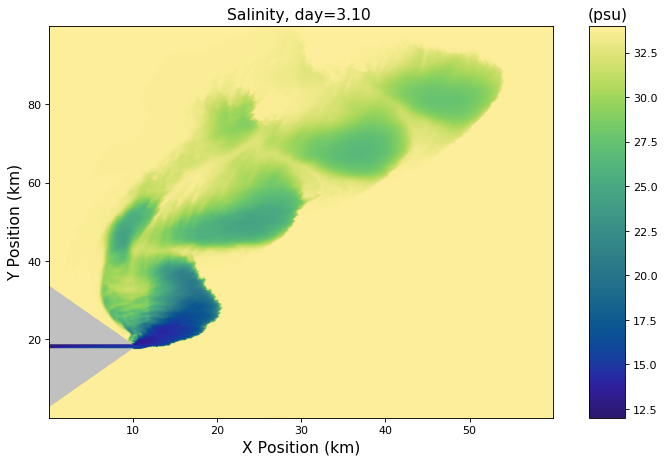

In [4]:
mask7 = Salt7.variables['S'][0,0,:,:]
mask7.shape
#Plotting surface salinity
index = 149
S7 = Salt7.variables['S'][index,0,:,:]
S7[mask7==0]=1e10
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

quad1 = ax1.pcolormesh(xq7/1000,yq7/1000,S7,cmap=cmocean.cm.haline,vmin=12.,vmax=34.,shading='gouraud')
#quad1 = ax1.pcolormesh(xq/1000,yq/1000,Salt,cmap='Spectral_r',vmin=12.,vmax=34.,shading='gouraud')
quad1.cmap.set_over('silver')
#ax1.set_xlim(0,30)
ax1.set_title('Salinity, day=%04.2f ' %(index/48.), fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('X Position (km)',fontsize=14)
ax1.set_ylabel('Y Position (km)',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)
plt.title('(psu)', fontsize=14)

Text(0.5, 1.0, '(psu)')

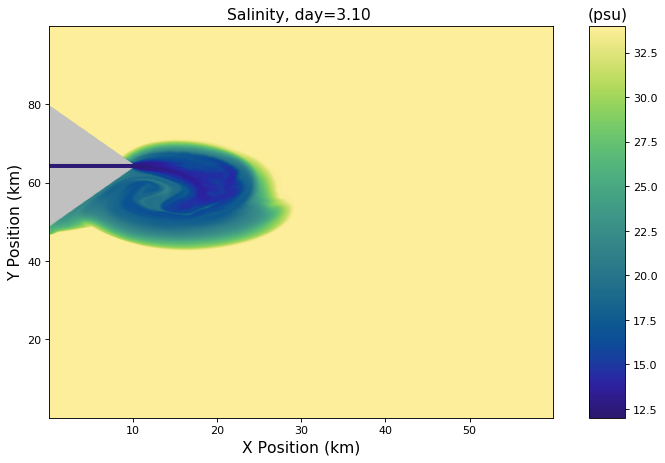

In [5]:
mask11 = Salt11.variables['S'][0,0,:,:]
mask11.shape
#Plotting surface salinity
index = 149
S11 = Salt11.variables['S'][index,0,:,:]
S11[mask11==0]=1e10
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

quad1 = ax1.pcolormesh(xq7/1000,yq7/1000,S11,cmap=cmocean.cm.haline,vmin=12.,vmax=34.,shading='gouraud')
#quad1 = ax1.pcolormesh(xq/1000,yq/1000,Salt,cmap='Spectral_r',vmin=12.,vmax=34.,shading='gouraud')
quad1.cmap.set_over('silver')
#ax1.set_xlim(0,30)
ax1.set_title('Salinity, day=%04.2f ' %(index/48.), fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('X Position (km)',fontsize=14)
ax1.set_ylabel('Y Position (km)',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)
plt.title('(psu)', fontsize=14)

In [6]:
print(S7.shape)

(1000, 600)


In [7]:
S7 = Salt7.variables['S'][:,0,:,:]; mask7 = Salt7.variables['S'][:,0,:,:]; S7[mask7==0]=1e10;
S11 = Salt11.variables['S'][:,0,:,:]; mask11 = Salt11.variables['S'][:,0,:,:]; S11[mask11==0]=1e10;
print('done')
    

done


In [1]:
%cd /work/eay/MITgcm_data/salinitygif
index = 0
fig = plt.figure(figsize=(8, 5), dpi= 300, facecolor='w', edgecolor='k') #width height

ax1 = fig.add_axes([0.1,0.1,0.3,0.8])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.45,0.1,0.3,0.8])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax3 = fig.add_axes([.8,0.1,0.05,0.8])


ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$y$ [km]',fontsize=14)

ax2.set_facecolor((0.92, 0.92, 0.92))
ax2.axes.set_yticklabels([''])
ax2.set_xlabel('$x$ [km]',fontsize=14)

for index in range(110,120):
    print(index)

    quad1 = ax1.pcolormesh(xq7/1000,yq7/1000,S7[index,:,:],cmap='RdYlBu_r',vmin=12.,vmax=34.,shading='gouraud')
    #quad1.cmap.set_over('silver')
    ax1.set_aspect('equal')
    ax1.set_title('$s$, day %04.2f ' %(index/48.), fontsize=14)

    quad2 = ax2.pcolormesh(xq11/1000,yq11/1000,S11[index,:,:],cmap='RdYlBu_r',vmin=12.,vmax=34.,shading='gouraud')
    #quad2.cmap.set_under('silver')
    ax2.set_aspect('equal')
    ax2.set_title('$s$, day %04.2f ' %(index/48.), fontsize=14)
    cb1 = fig.colorbar(quad2,ax3)

    plt.savefig('index%.3d'%index)
    fig.show()
%cd /work/eay/MITgcm_data/


#fig.savefig('Figure1.png', format='png', dpi=200)

[Errno 2] No such file or directory: '/work/eay/MITgcm_data/salinitygif'
/work0/eay/MITgcm_data


NameError: name 'plt' is not defined

In [8]:
print('done')

done


/work0/eay/MITgcm_data/hfresh
100
101
102
103
104
105
106
107
108
109
/work0/eay/MITgcm_data


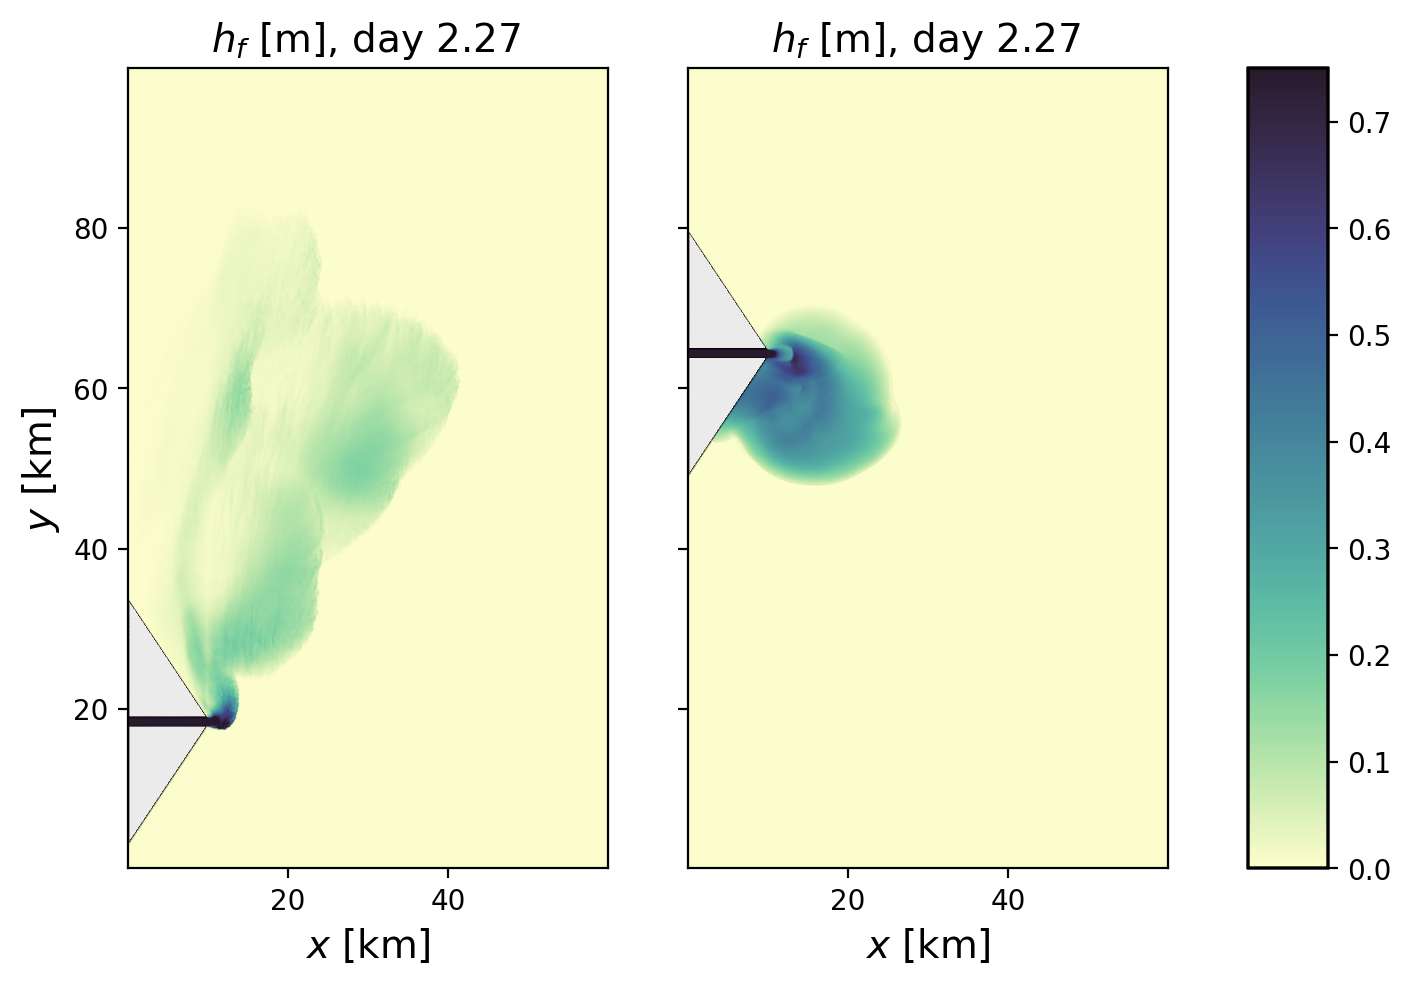

In [9]:
%cd /work/eay/MITgcm_data/hfresh
index = 0
fig = plt.figure(figsize=(8, 5), dpi= 200, facecolor='w', edgecolor='k') #width height

ax1 = fig.add_axes([0.1,0.1,0.3,0.8])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.45,0.1,0.3,0.8])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax3 = fig.add_axes([.8,0.1,0.05,0.8])


ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$y$ [km]',fontsize=14)

ax2.set_facecolor((0.92, 0.92, 0.92))
ax2.axes.set_yticklabels([''])
ax2.set_xlabel('$x$ [km]',fontsize=14)


newmask7 = Salt7.variables['S'][0,:,:,:]
newmask11 = Salt11.variables['S'][0,:,:,:]
for index in range(100,110):
    print(index)
    Salt_h7 = Salt7.variables['S'][index,:,:,:]; Salt_h7[newmask7==0]=np.nan
    Sref7 = Salt_h7*0.0+34.0; hf7=0.1*np.nansum((Sref7-Salt_h7)/34.0,axis=0)
    mask7 = Salt_h7[0,:,:]
    hf7[(mask7==0)]=-100

    Salt_h11 = Salt11.variables['S'][index,:,:,:]; Salt_h11[newmask11==0]=np.nan
    Sref11 = Salt_h11*0.0+34.0; hf11=0.1*np.nansum((Sref11-Salt_h11)/34.0,axis=0)
    mask11 = Salt_h11[0,:,:]
    hf11[(mask11==0)]=-100


    quad1 = ax1.pcolormesh(xq7/1000,yq7/1000,hf7[:,:],cmap=cmocean.cm.deep,shading='gouraud',vmin=0,vmax=.75)
    quad1.cmap.set_under('silver')
    ax1.set_aspect('equal')
    ax1.set_title('$h_f$ [m], day %04.2f ' %(index/48.), fontsize=14)



    quad2 = ax2.pcolormesh(xq11/1000,yq11/1000,hf11[:,:],cmap=cmocean.cm.deep,shading='gouraud',vmin=0,vmax=.75)
    quad2.cmap.set_under('silver')
    ax2.set_aspect('equal')
    ax2.set_title('$h_f$ [m], day %04.2f ' %(index/48.), fontsize=14)

    cb1 = fig.colorbar(quad2,ax3)

    plt.savefig('index%.3d'%index)
    fig.show()
%cd /work/eay/MITgcm_data/
